<h2>[ Preview ]</h2>

<h4>
<ul>
    <li>iris data</li>
    <li>K-Means Clustering</li>
    <li>Elbow Technique</li>
</ul>
</h4>

<h2>[ EXERCISE ]</h2>

<h4>
<ol>
    <li>Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.</li>
    <li>Figure out if any preprocessing such as scaling would help here</li>
    <li>Draw elbow plot and from that figure out optimal value of k</li>
</ol>
</h4>

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

In [8]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns', inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


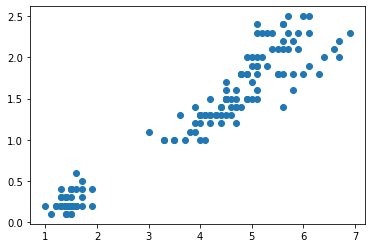

In [19]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])


In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

df['Cluster'] = y_predicted

df.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [21]:
df.Cluster.unique()

array([0, 2, 1])

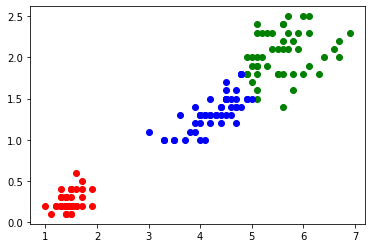

In [22]:
df_0 = df[df['Cluster']==0]
df_1 = df[df['Cluster']==1]
df_2 = df[df['Cluster']==2]

plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'], c='r')
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], c='g')
plt.scatter(df_2['petal length (cm)'], df_2['petal width (cm)'], c='b')


---

In [23]:
scaler = MinMaxScaler()

df_scale = df
scaler.fit(df_scale[['petal length (cm)']])
df_scale['petal length (cm)'] = scaler.transform(df_scale[['petal length (cm)']])

scaler.fit(df_scale[['petal width (cm)']])
df_scale['petal width (cm)'] = scaler.transform(df_scale[['petal width (cm)']])

df_scale.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [25]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_scale[['petal length (cm)', 'petal width (cm)']])
df_scale['Cluster_scaler'] = y_predicted

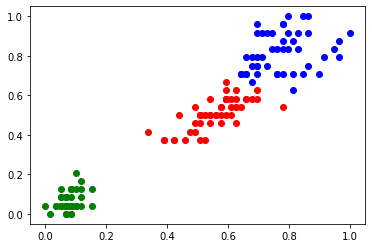

In [27]:
df_0 = df_scale[df_scale['Cluster_scaler']==0]
df_1 = df_scale[df_scale['Cluster_scaler']==1]
df_2 = df_scale[df_scale['Cluster_scaler']==2]

plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'], c='r')
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], c='g')
plt.scatter(df_2['petal length (cm)'], df_2['petal width (cm)'], c='b')

---

In [28]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df_scale[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667126,
 0.8535683225340072,
 0.6795297632254396,
 0.5678954812696254,
 0.48580845539143697,
 0.4132667782512474]

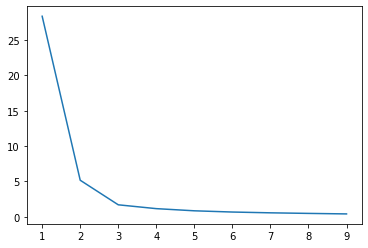

In [29]:
plt.plot(k_rng, sse)